In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Binarizer, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv("D:\GKD\ML\K-mean\wine.csv")

In [7]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Khởi tạo bộ chuẩn hóa MinMaxScaler
#sẽ biến đổi các đặc trưng sao cho tất cả các giá trị đều nằm trong một khoảng nhất định, thường là từ 0 đến 1.
mms = MinMaxScaler()

# Giả sử 'data' là DataFrame chứa dữ liệu rượu vang, với một cột 'class' không cần chuẩn hóa
# Áp dụng MinMaxScaler cho tất cả các cột trừ cột 'class'
data.loc[:, data.columns != 'class'] = mms.fit_transform(data.loc[:, data.columns != 'class'])


In [9]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


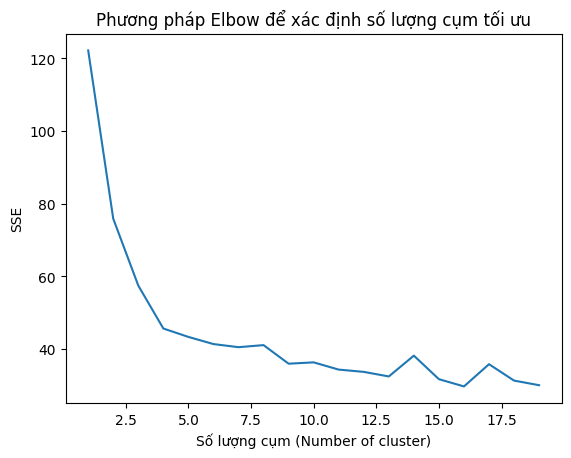

In [10]:
data_elb = data.loc[:, data.columns != 'class']

# Tạo dictionary để lưu trữ SSE cho mỗi số lượng cụm
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_elb)
    data_elb ["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_  # Inertia: Tổng khoảng cách từ các điểm đến trung tâm cụm gần nhất

# Vẽ biểu đồ Elbow
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Số lượng cụm (Number of cluster)")
plt.ylabel("SSE")
plt.title("Phương pháp Elbow để xác định số lượng cụm tối ưu")
plt.show()


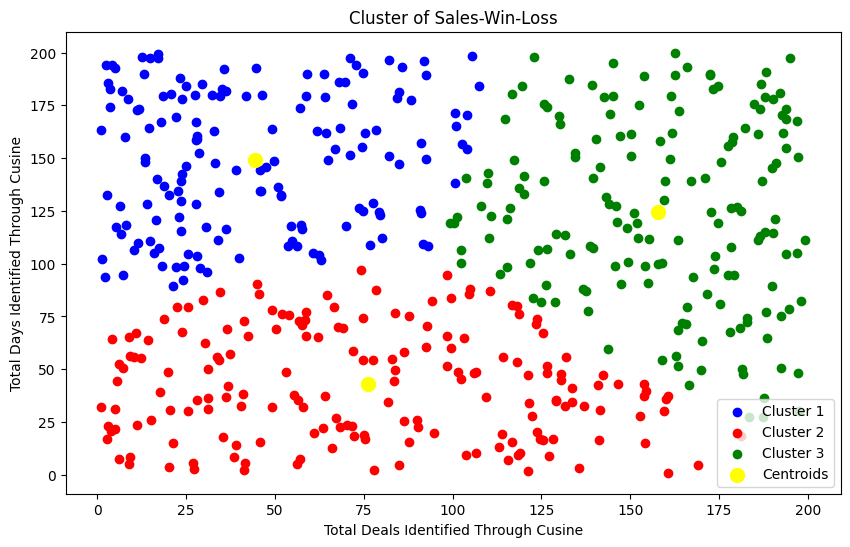

In [22]:
# Đặt seed cho việc tạo dữ liệu ngẫu nhiên
np.random.seed(42)
X = np.random.rand(500, 2) * 200

# Thực hiện phân cụm KMeans với 3 cụm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

# Tạo biểu đồ phân tán với màu sắc cụm
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']
for i in range(3):
    cluster = X[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

# Đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('Total Deals Identified Through Cusine')
plt.ylabel('Total Days Identified Through Cusine')
plt.title('Cluster of Sales-Win-Loss')
plt.legend(loc='best')

# Hiển thị biểu đồ
plt.show()
